# Linear Regression in Machine Learning

Linear regression is one of the simplest and most important algorithms in machine learning. It is mainly used for predicting a **continuous value** (like price, salary, temperature).

---

## 1. What is Linear Regression?
Linear regression models the relationship between:
* **Input feature(s)** $\rightarrow X$
* **Output (target)** $\rightarrow y$

It assumes that this relationship is linear.

### Simple Linear Regression (one feature)
$$y = mx + c$$

* $x \rightarrow$ input feature
* $y \rightarrow$ predicted output
* $m \rightarrow$ slope (weight)
* $c \rightarrow$ intercept (bias)



---

## 2. Multiple Linear Regression
When there are multiple features:
$$y = w_1x_1 + w_2x_2 + \dots + w_nx_n + b$$

* $w_i \rightarrow$ weights
* $b \rightarrow$ bias

**In vector form:**
$$y = \mathbf{w}^T \mathbf{x} + b$$

---

## 3. How does it learn?
The goal is to find the best line (or hyperplane) that minimizes the error between the **Actual value** ($y$) and the **Predicted value** ($\hat{y}$).

### Loss Function
The most common is **Mean Squared Error (MSE)**:
$$\text{MSE} = \frac{1}{n}\sum (y - \hat{y})^2$$

---

## 4. Optimization
To minimize loss, we use:
* **Gradient Descent:** Most common in ML.
* **Normal Equation:** Closed-form, used in small datasets.

**Gradient Descent update rule:**
$$w := w - \alpha \frac{\partial L}{\partial w}$$

* $\alpha \rightarrow$ learning rate



---

## 5. Assumptions of Linear Regression
Linear regression works best when:
1. **Linearity** – Relationship is linear.
2. **Independence** – Observations are independent.
3. **Homoscedasticity** – Constant variance of errors.
4. **Normality of errors** – Errors are normally distributed.
5. **No multicollinearity** – Features are not highly correlated.

---

## 6. Where is it used?
* 🏠 House price prediction
* 💰 Salary prediction
* 📈 Sales forecasting
* 📊 Trend analysis

In [29]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [30]:
# load data
df = pd.read_csv('Exercise/canada_per_capita_income.csv')
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


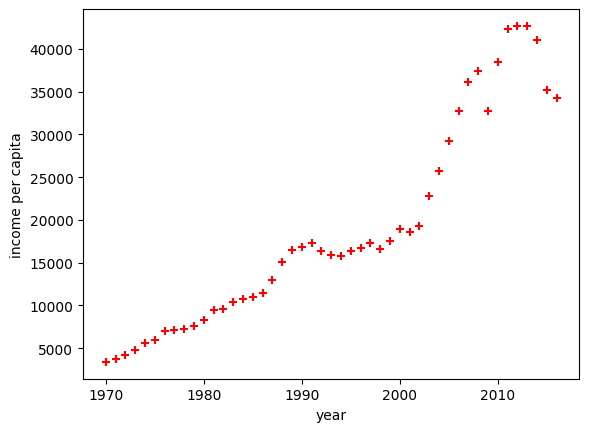

In [31]:
# plot
plt.xlabel("year")
plt.ylabel("income per capita")
plt.scatter(df['year'], df["per capita income (US$)"], color='red', marker='+')

In [32]:
#x variable
new_df = df.drop('per capita income (US$)',axis='columns')
new_df

,year
0,1970
1,1971
2,1972
3,1973
4,1974
5,1975
6,1976
7,1977
8,1978
9,1979


In [33]:
# y variable
income = df['per capita income (US$)']
income

0      3399.299037
1      3768.297935
2      4251.175484
3      4804.463248
4      5576.514583
5      5998.144346
6      7062.131392
7      7100.126170
8      7247.967035
9      7602.912681
10     8355.968120
11     9434.390652
12     9619.438377
13    10416.536590
14    10790.328720
15    11018.955850
16    11482.891530
17    12974.806620
18    15080.283450
19    16426.725480
20    16838.673200
21    17266.097690
22    16412.083090
23    15875.586730
24    15755.820270
25    16369.317250
26    16699.826680
27    17310.757750
28    16622.671870
29    17581.024140
30    18987.382410
31    18601.397240
32    19232.175560
33    22739.426280
34    25719.147150
35    29198.055690
36    32738.262900
37    36144.481220
38    37446.486090
39    32755.176820
40    38420.522890
41    42334.711210
42    42665.255970
43    42676.468370
44    41039.893600
45    35175.188980
46    34229.193630
Name: per capita income (US$), dtype: float64

In [34]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,income)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


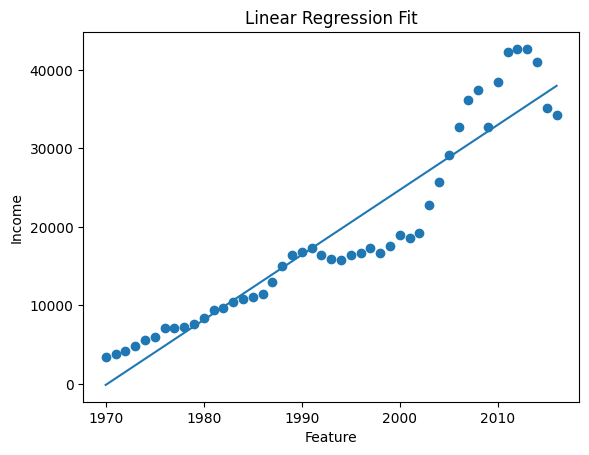

In [35]:
# Scatter plot of actual data
plt.scatter(new_df, income)
# Plotting the regression line
plt.plot(new_df, reg.predict(new_df))

plt.xlabel("Feature")
plt.ylabel("Income")
plt.title("Linear Regression Fit")
plt.show()

In [36]:
reg.predict([[2020]])

d:\ML basics\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

## Linear Reg with multi variable

In [37]:
data = pd.read_csv("hiring.csv")
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [38]:
data['test_score(out of 10)'].median()

np.float64(8.0)

In [39]:
data['test_score(out of 10)'].fillna(data['test_score(out of 10)'].median(), inplace=True)
data

C:\Users\indroneel\AppData\Local\Temp\ipykernel_14664\1734986271.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['test_score(out of 10)'].fillna(data['test_score(out of 10)'].median(), inplace=True)


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [40]:
word_to_num = {
    'zero': 0,
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'seven': 7,
    'eight': 8,
    'nine': 9,
    'ten': 10,
    'eleven': 11
}

In [41]:
data['experience'] = data['experience'].map(word_to_num)
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,8.0,7,72000
7,11.0,7.0,8,80000


In [42]:
data['experience'].fillna(0, inplace=True)
data

C:\Users\indroneel\AppData\Local\Temp\ipykernel_14664\48861586.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['experience'].fillna(0, inplace=True)


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,8.0,7,72000
7,11.0,7.0,8,80000


In [43]:
reg = linear_model.LinearRegression()
reg.fit(data.drop('salary($)',axis='columns'),data['salary($)'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [44]:
reg.predict([[2, 9, 6]])

d:\ML basics\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])